Репозиторий на GitHub: https://github.com/irinik/unbalanced_data

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#Общий-вывод-по-проекту" data-toc-modified-id="Общий-вывод-по-проекту-6"><span class="toc-item-num">6&nbsp;&nbsp;</span><b>Общий вывод по проекту</b></a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

<div style="background-color:#e0ffff; color:#191970; padding:10px">

# Информация по проекту

**Цель проекта:**
На основе имеющихся данных о клиентах банка, которые расторгли договор обслуживания, построить систему, способную спрогнозировать, уйдет ли клиент из банка в ближайшее время.

***Опиание данных:***

Имеются следующие данные:    
***RowNumber*** — *индекс строки в данных*     
***CustomerId*** — *уникальный идентификатор клиента*     
***Surname*** — *фамилия*     
***CreditScore*** — *кредитный рейтинг*     
***Geography*** — *страна проживания*    
***Gender*** — *пол*     
***Age*** — *возраст*    
***Tenure*** — *сколько лет человек является клиентом банка*     
***Balance*** — *баланс на счёте*     
***NumOfProducts*** — *количество продуктов банка, используемых клиентом*    
***HasCrCard*** — *наличие кредитной карты*    
***IsActiveMember*** — *активность клиента*      
***EstimatedSalary*** — *предполагаемая зарплата.*     

***План действий:***
 - открыть и изучить данные
 - исследовать баланс классов
 - обучить модели без учета дисбаланса классов
 - применить разные методы работы с дисбалансом классов, оценить результаты
 - провести финальное тестирование
 - сделать выводы
<div>

## Подготовка данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, recall_score, precision_score, accuracy_score, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
from sklearn.utils import shuffle
from imblearn.over_sampling import SMOTE
import phik

In [2]:
pd.options.mode.chained_assignment = None

In [3]:
df = pd.read_csv('/home/serenity/short/teacher/Churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

1. Просмотрела основную информацию о выборке - в признаке 'Tenure' (сколько лет человек является клиентом банка) присутствуют значения NAN.       
2. Просмотрела данные о количестве клиентов по годам. Получается, если добавить все строки с  Nan в какой-то один год, например 0 - может получится искажение данных, которое повлияет на обучение и работу моделей.     

<div>

In [6]:
df['Tenure'] = df['Tenure'].fillna(-1)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [8]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [9]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [10]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [11]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
geography_ohe = pd.get_dummies(df['Geography'], drop_first=True)
df['Gender_men'] = pd.get_dummies(df['Gender'], drop_first=True)
df = pd.concat([df, geography_ohe], axis=1)
df = df.drop(['Gender', 'Geography'], axis=1)

In [13]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Gender_men,Germany,Spain
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,0,1
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,0,1


In [14]:
df[df.columns[1:]].phik_matrix()['Exited'][:].sort_values(ascending=False)

interval columns not set, guessing: ['Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited', 'Gender_men', 'Germany', 'Spain']


Exited             1.000000
NumOfProducts      0.565084
Age                0.487524
Germany            0.268297
IsActiveMember     0.241939
Balance            0.183365
Gender_men         0.165422
Spain              0.080682
Tenure             0.023356
HasCrCard          0.000000
EstimatedSalary    0.000000
Name: Exited, dtype: float64

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Выводы по обработке данных:

Обработка данных заключалась в следующем:      
- применила заполнитель "-1" к объектам, у которых значение Nan в колонке 'Tenure'
- исключила признаки, которые не помогут в построении модели: RowNumber, CustomerId, Surname      
- применила технику прямого кодирования для того, чтобы преобразовать категориальные признаки *пол* и *страна*

После этого просмотрела информацию о получившемся датасете
    
Изучила зависимость имеющихся признаков с целевым признаком используя phik матрицу - можно отметить зависимость ухода клиентов от количества продуктов - что странно и от возраста, что более понятно.                

Это навело на мысль, что клиенты могут уходить по объективным причинам и с этим практически невозможно что то сделать (например, в связи со смертью).

<div>

## Исследование задачи

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Изучила соотношение классов в целевом признаке в получившемся датасете, отметила несбалансированность классов:         
20% - класс 1 и 80% - класс 0.

<div>

Соотношение классов 0 и 1 в долях:
0    0.7963
1    0.2037
Name: Exited, dtype: float64


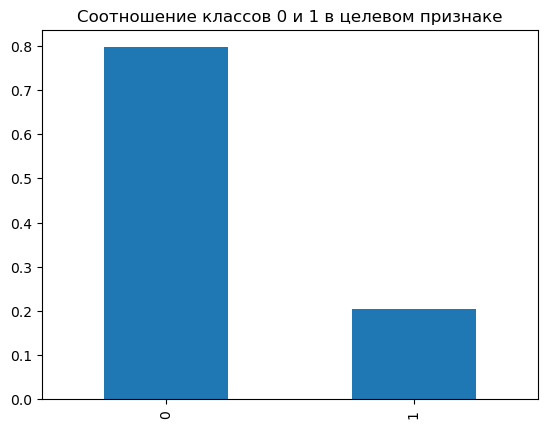

In [15]:
class_frequency = df['Exited'].value_counts(normalize=True)
print('Соотношение классов 0 и 1 в долях:')
print(class_frequency)

class_frequency.plot(kind='bar', title='Соотношение классов 0 и 1 в целевом признаке')
plt.show()

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Разбила датасет на выборки: обучающую, валидационную и тестовую в соотношении 60:20:20.    

<div>

In [16]:
target = df['Exited']
features = df.drop('Exited', axis=1)


In [17]:
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, \
                                                                              random_state=0)

In [18]:
features_train, features_valid, target_train, target_valid = \
train_test_split(features_train, target_train, test_size=0.25, random_state=0)

In [19]:
print('Количество объектов в тренировочной выборке:', target_train.shape)
print('Доля класса 1 в тренировочной выборке:')
target_train.mean()

Количество объектов в тренировочной выборке: (6000,)
Доля класса 1 в тренировочной выборке:


0.2025

In [20]:
print('Количество объектов в валидационной выборке:', target_valid.shape)
print('Доля класса 1 в валидационной выборке:')
target_valid.mean()

Количество объектов в валидационной выборке: (2000,)
Доля класса 1 в валидационной выборке:


0.2085

In [21]:
print('Количество объектов в тестовой выборке:', target_test.shape)
print('Доля класса 1 в тестовой выборке:')
target_test.mean()

Количество объектов в тестовой выборке: (2000,)
Доля класса 1 в тестовой выборке:


0.2025

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Сделала масштабирование признаков, имеющих разный масштаб значений: ***кредитный рейтинг, возраст, баланс, предполагаемая зарплата.***     
Для этого обучила алгоритм на тренировочной выборке, а затем применила его для масштабирования данных в тренировочной, валидационной и тестовой выборках.     
<div>

In [22]:
numeric = ['CreditScore', 'Age', 'Balance', 'EstimatedSalary']

In [23]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

In [24]:
features_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Gender_men,Germany,Spain
8997,0.614238,-0.568058,-1.0,-1.211216,2,1,0,-0.470238,0,0,0
2295,0.500880,0.100058,7.0,-1.211216,1,0,1,0.917127,1,0,0
6793,-0.282322,1.054511,7.0,0.811186,1,0,1,-1.725150,1,1,0
2071,0.366911,-0.281722,5.0,-1.211216,2,1,1,0.918915,0,0,1
6344,2.056978,0.195504,3.0,-1.211216,2,1,0,0.500839,1,0,0


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Далее использовала получившиеся выборки.
В целях проведения исследования применяла алгоритмы классификации Логистической регрессии и Случайного леса.        
Обучила эти два алгоритма (подобрав оптимальные гиперпараметры) без использования способов учета дисбаланса классов, затем применила их к валидационной выборке, получила результаты валидации.                   
    
Параллельно сделала заготовку для таблицы, чтобы отслеживать различные метрики моделей с учетом применяемых методов (df_result)

<div>

In [25]:
df_result = pd.DataFrame(columns=['model', 'tp', 'tn', 'fp', 'fn', 'correct', 'incorrect',
                                  'accuracy', 'precision', 'recall', 'f1', 'roc_auc'])

In [26]:
def metric(target_valid, predicted_valid, features_valid, model_name):
    tn, fp, fn, tp = confusion_matrix(target_valid, predicted_valid).ravel()
    accuracy = accuracy_score(target_valid, predicted_valid)
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
    row = {'model': model_name,
           'tp': tp,
           'tn': tn,
           'fp': fp,
           'fn': fn,
           'correct': tp+tn,
           'incorrect': fp+fn,
           'accuracy': round(accuracy,3),
           'precision': round(precision,3),
           'recall': round(recall,3),
           'f1': round(f1,3),
           'roc_auc': round(roc_auc,3)
           }
    return row

In [27]:
model = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Logistic Regression')

df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.3292035398230088


/tmp/ipykernel_28624/1570618425.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.81,0.628,0.223,0.329,0.775


ROC_AUC: 0.7751908391164516


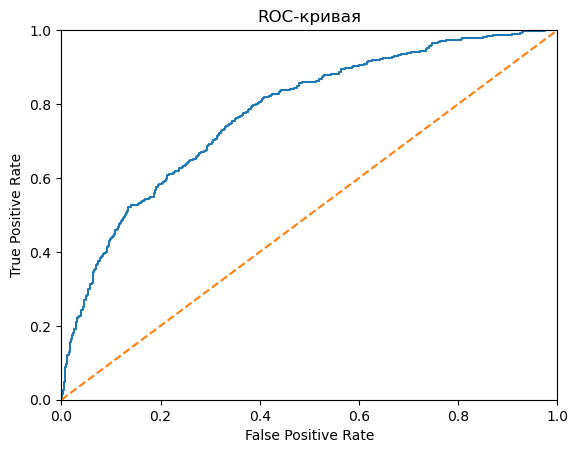

In [28]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [29]:
model = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid,  'Random Forest')

df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.5954198473282443


/tmp/ipykernel_28624/3471058819.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868


ROC_AUC: 0.8680146217833061


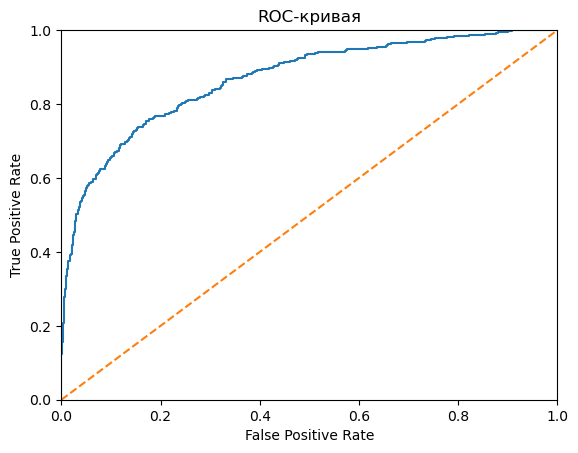

In [30]:
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

roc_auc = roc_auc_score(target_valid, probabilities_one_valid)
print("ROC_AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Вывод о моделях, не учитывающих дисбаланс классов:

***Получились следующие значения F1:***          
*Логистическая регрессия:  0.329*      
*Случайный лес:  0.595*            
    
Исходя из получившихся метрик можно сделать следующие выводы:
- модель случайного леса показала значительно лучший результат 
- у логистической регрессии все метрики показали результаты хуже, чем у случайного леса      
    

Далее посмотрим результаты моделей при различных способах работы с несбалансированностью классов 
    
<div>

## Борьба с дисбалансом

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Для работы с дисбалансом есть разные способы. Попробую некоторые из них.  

Для сравнения моделей и способов борьбы с дисбалансом классов решила кроме показателя F1 использовать дополнительные метрики, сделав для них таблицу (df_result), которая будет заполняться по мере проведения исследования (показатели полноты, точности, количество правильных, неправильных ответов каждого класса и другие).
    
Дополнительные метрики позволяют всесторонне оценить модель и иные используемые параметры и сделать выбор модели более обоснованным.
    
Например, при формировании прогноза, уйдет ли клиент из банка показатель полноты имеет более важное значение, чем показатель точности, т.к. уход клиента влечет потери доходов банка.    

<div>

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
**Первый способ** работы с дисбалансом классов, который я рассмотрела - использование гиперпараметра class_weight со значением 'balanced'.        
Результат F1 у логистической регрессии улучшился значительно: с 0.329 до 0.497.      
Результат F1 у случайного леса также улучшился: с 0.595 до 0.655.

<div>

In [31]:
model = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10, class_weight='balanced')
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
print("F1:", f1_score(target_valid, predicted_valid))
row = metric(target_valid, predicted_valid, features_valid, 'Logistic Regression balanced')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.4969485614646905


/tmp/ipykernel_28624/241662493.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779


In [32]:
model_rf_bal = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, \
                               random_state=0, class_weight='balanced')
model_rf_bal.fit(features_train, target_train)
predicted_valid = model_rf_bal.predict(features_valid) 
 
print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Random Forest balanced')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.6551724137931034


/tmp/ipykernel_28624/1053412509.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779
3,Random Forest balanced,266,1454,129,151,1720,280,0.860,0.673,0.638,0.655,0.779


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

**Второй способ** работы с дисбалансом классов - увеличение выборки.        
Для этого использовала написанную функцию upsample.                         
Количество повторений объектов класса 1 выбрала 3 учитывая, что соотношение классов в целевом признаке в выборках примерно 1:4 и чтобы класс 0 с учетом корректировки остался преобладающим.        
Результат F1 у линейной регрессии получился 0.49      
Результат F1 у случайного леса - 0.645               

<div>

In [33]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=0)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 3)

In [34]:
target_upsampled.value_counts()

0    4785
1    3645
Name: Exited, dtype: int64

In [35]:
model = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))


row = metric(target_valid, predicted_valid, features_valid,  'Logistic Regression upsampled')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.49272349272349275


/tmp/ipykernel_28624/1278781057.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779
3,Random Forest balanced,266,1454,129,151,1720,280,0.860,0.673,0.638,0.655,0.779
4,Logistic Regression upsampled,237,1275,308,180,1512,488,0.756,0.435,0.568,0.493,0.778


In [36]:
model = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model.fit(features_upsampled, target_upsampled)
predicted_valid = model.predict(features_valid) 
print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Random Forest upsampled')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.6452380952380953


/tmp/ipykernel_28624/1809657166.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779
3,Random Forest balanced,266,1454,129,151,1720,280,0.860,0.673,0.638,0.655,0.779
4,Logistic Regression upsampled,237,1275,308,180,1512,488,0.756,0.435,0.568,0.493,0.778
5,Random Forest upsampled,271,1431,152,146,1702,298,0.851,0.641,0.650,0.645,0.867


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

**Третий способ** работы с дисбалансом классов - уменьшение выборки.        
Для этого использовала написанную функцию downsample.         
Соотношение для уменьшения объектов класса 0 выбрала 0.33 учитывая ту же логику, что и в предыдущем варианте, только в обратную сторону (1/3 ~ 0.33).    
Результат F1 у линейной регрессии - 0.49     
Результат F1 у случайного - 0.63

<div>

In [37]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.33)

In [38]:
target_downsampled.value_counts()

0    1579
1    1215
Name: Exited, dtype: int64

In [39]:
lr_downsampled = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
lr_downsampled.fit(features_downsampled, target_downsampled)
predicted_valid = lr_downsampled.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Logistic Regression downsampled')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.4887063655030801


/tmp/ipykernel_28624/3041646326.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779
3,Random Forest balanced,266,1454,129,151,1720,280,0.860,0.673,0.638,0.655,0.779
4,Logistic Regression upsampled,237,1275,308,180,1512,488,0.756,0.435,0.568,0.493,0.778
5,Random Forest upsampled,271,1431,152,146,1702,298,0.851,0.641,0.650,0.645,0.867
6,Logistic Regression downsampled,238,1264,319,179,1502,498,0.751,0.427,0.571,0.489,0.867


In [40]:
clf_downsampled = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
clf_downsampled.fit(features_downsampled, target_downsampled)
predicted_valid = clf_downsampled.predict(features_valid) 

print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Random Forest downsampled')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.6284501061571125


/tmp/ipykernel_28624/1280083772.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779
3,Random Forest balanced,266,1454,129,151,1720,280,0.860,0.673,0.638,0.655,0.779
4,Logistic Regression upsampled,237,1275,308,180,1512,488,0.756,0.435,0.568,0.493,0.778
5,Random Forest upsampled,271,1431,152,146,1702,298,0.851,0.641,0.650,0.645,0.867
6,Logistic Regression downsampled,238,1264,319,179,1502,498,0.751,0.427,0.571,0.489,0.867
7,Random Forest downsampled,296,1354,229,121,1650,350,0.825,0.564,0.710,0.628,0.867


### <div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

**Четвертый способ** работы с дисбалансом классов - изучить порог, определяющий границу классов и его влияние на метрики модели.   
    
Изучила влияние порога также на моделях линейной регрессии и случайного леса.          
    
В модели ***логистической регрессии:***         
    - при применении порога 0.30:              
    - максимальное значение F1 - 0.504,               
    - полнота - 0.506,             
    - точность - 0.502               
    
В модели ***случайного леса:***                  
    - при применении порога 0.38:               
    - максимальное значение F1 - 0.65,                
    - полнота - 0.59,              
    - точность - 0.73           
      
<div>

Порог = 0.00 | Точность = 0.208, Полнота = 1.000 | F1 = 0.345
Порог = 0.02 | Точность = 0.210, Полнота = 1.000 | F1 = 0.346
Порог = 0.04 | Точность = 0.220, Полнота = 0.990 | F1 = 0.360
Порог = 0.06 | Точность = 0.242, Полнота = 0.976 | F1 = 0.387
Порог = 0.08 | Точность = 0.259, Полнота = 0.938 | F1 = 0.406
Порог = 0.10 | Точность = 0.279, Полнота = 0.916 | F1 = 0.428
Порог = 0.12 | Точность = 0.303, Полнота = 0.878 | F1 = 0.451
Порог = 0.14 | Точность = 0.331, Полнота = 0.837 | F1 = 0.475
Порог = 0.16 | Точность = 0.350, Полнота = 0.796 | F1 = 0.486
Порог = 0.18 | Точность = 0.367, Полнота = 0.746 | F1 = 0.492
Порог = 0.20 | Точность = 0.380, Полнота = 0.686 | F1 = 0.489
Порог = 0.22 | Точность = 0.398, Полнота = 0.643 | F1 = 0.491
Порог = 0.24 | Точность = 0.428, Полнота = 0.607 | F1 = 0.502
Порог = 0.26 | Точность = 0.439, Полнота = 0.559 | F1 = 0.492
Порог = 0.28 | Точность = 0.468, Полнота = 0.535 | F1 = 0.499
Порог = 0.30 | Точность = 0.502, Полнота = 0.506 | F1 = 0.504
Порог = 

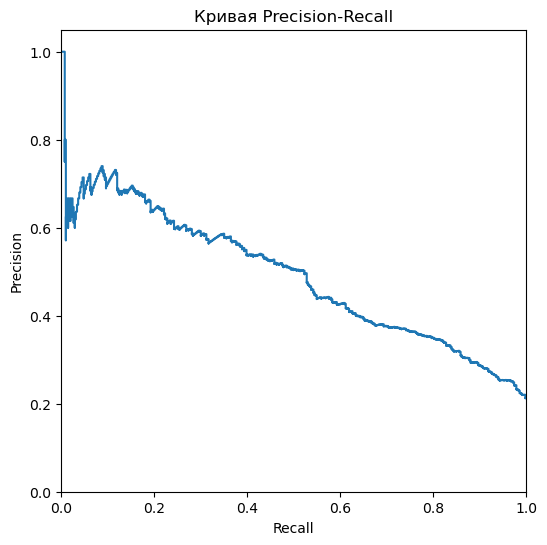

In [41]:
model = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.4, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1 = {:.3f}".format(
        threshold, precision, recall, f1))


probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show() 

Порог = 0.00 | Точность = 0.208, Полнота = 1.000 | F1 = 0.3451
Порог = 0.02 | Точность = 0.225, Полнота = 1.000 | F1 = 0.3669
Порог = 0.04 | Точность = 0.248, Полнота = 0.981 | F1 = 0.3954
Порог = 0.06 | Точность = 0.277, Полнота = 0.959 | F1 = 0.4301
Порог = 0.08 | Точность = 0.313, Полнота = 0.940 | F1 = 0.4692
Порог = 0.10 | Точность = 0.346, Полнота = 0.914 | F1 = 0.5020
Порог = 0.12 | Точность = 0.373, Полнота = 0.892 | F1 = 0.5265
Порог = 0.14 | Точность = 0.406, Полнота = 0.868 | F1 = 0.5531
Порог = 0.16 | Точность = 0.427, Полнота = 0.825 | F1 = 0.5630
Порог = 0.18 | Точность = 0.461, Полнота = 0.806 | F1 = 0.5864
Порог = 0.20 | Точность = 0.490, Полнота = 0.772 | F1 = 0.5996
Порог = 0.22 | Точность = 0.521, Полнота = 0.760 | F1 = 0.6179
Порог = 0.24 | Точность = 0.558, Полнота = 0.734 | F1 = 0.6342
Порог = 0.26 | Точность = 0.579, Полнота = 0.703 | F1 = 0.6349
Порог = 0.28 | Точность = 0.614, Полнота = 0.674 | F1 = 0.6423
Порог = 0.30 | Точность = 0.637, Полнота = 0.652 | F1 =

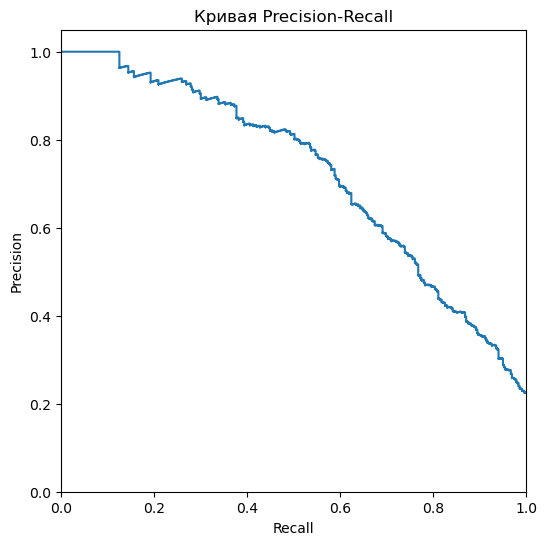

In [42]:
model = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

for threshold in np.arange(0, 0.5, 0.02):
    predicted_valid = probabilities_one_valid > threshold
    precision = precision_score(target_valid, predicted_valid)
    recall = recall_score(target_valid, predicted_valid)
    f1 = f1_score(target_valid, predicted_valid)

    print("Порог = {:.2f} | Точность = {:.3f}, Полнота = {:.3f} | F1 = {:.4f}".format(
        threshold, precision, recall, f1))

probabilities_valid = model.predict_proba(features_valid)
precision, recall, thresholds = precision_recall_curve(target_valid, probabilities_valid[:, 1])

plt.figure(figsize=(6, 6))
plt.step(recall, precision, where='post')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Кривая Precision-Recall')
plt.show()

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

**Пятый способ** работы с дисбалансом классов - использование техники SMOTE библиотеки imblearn.

SMOTE отличается от upsampling тем, что не просто умножает объекты с миноритарным классом, а  создает новые "искусственные" объекты, близкие по значению к объектам класса меньшинства, которые  используются для увеличения объектов признака, который "в меньшинстве".    
      
<div>

In [43]:
oversampled = SMOTE(random_state=0)
features_train_smote, target_train_smote = oversampled.fit_resample(features_train, target_train)
target_train_smote.value_counts()

0    4785
1    4785
Name: Exited, dtype: int64

In [44]:
classifier = LogisticRegression(random_state=0, solver='liblinear', C=1, max_iter=10)
model = classifier.fit(features_train_smote, target_train_smote)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Logistic Regression SMOTE')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.4798500468603562


/tmp/ipykernel_28624/2111220893.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779
3,Random Forest balanced,266,1454,129,151,1720,280,0.860,0.673,0.638,0.655,0.779
4,Logistic Regression upsampled,237,1275,308,180,1512,488,0.756,0.435,0.568,0.493,0.778
5,Random Forest upsampled,271,1431,152,146,1702,298,0.851,0.641,0.650,0.645,0.867
6,Logistic Regression downsampled,238,1264,319,179,1502,498,0.751,0.427,0.571,0.489,0.867
7,Random Forest downsampled,296,1354,229,121,1650,350,0.825,0.564,0.710,0.628,0.867
8,Logistic Regression SMOTE,256,1189,394,161,1445,555,0.722,0.394,0.614,0.480,0.748


In [45]:
classifier = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model = classifier.fit(features_train_smote, target_train_smote)
predicted_valid = model.predict(features_valid)

print("F1:", f1_score(target_valid, predicted_valid))

row = metric(target_valid, predicted_valid, features_valid, 'Random Forest SMOTE')
df_result = df_result.append(row, ignore_index=True)
df_result

F1: 0.6225596529284164


/tmp/ipykernel_28624/701084860.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779
3,Random Forest balanced,266,1454,129,151,1720,280,0.860,0.673,0.638,0.655,0.779
4,Logistic Regression upsampled,237,1275,308,180,1512,488,0.756,0.435,0.568,0.493,0.778
5,Random Forest upsampled,271,1431,152,146,1702,298,0.851,0.641,0.650,0.645,0.867
6,Logistic Regression downsampled,238,1264,319,179,1502,498,0.751,0.427,0.571,0.489,0.867
7,Random Forest downsampled,296,1354,229,121,1650,350,0.825,0.564,0.710,0.628,0.867
8,Logistic Regression SMOTE,256,1189,394,161,1445,555,0.722,0.394,0.614,0.480,0.748
9,Random Forest SMOTE,287,1365,218,130,1652,348,0.826,0.568,0.688,0.623,0.852


In [46]:
# Модель Случайный лес с порогом 0.38
model = RandomForestClassifier(n_estimators=90, max_depth=12, min_samples_leaf=3, random_state=0)
model.fit(features_train, target_train)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
predicted_valid = probabilities_one_valid > 0.38

print("F1:", f1_score(target_valid, predicted_valid))
    

F1: 0.650730411686587


In [47]:
row = metric(target_valid, predicted_valid, features_valid, 'Random Forest threshold 0.38 VALID')
df_result = df_result.append(row, ignore_index=True)
df_result

/tmp/ipykernel_28624/3397314482.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779
3,Random Forest balanced,266,1454,129,151,1720,280,0.860,0.673,0.638,0.655,0.779
4,Logistic Regression upsampled,237,1275,308,180,1512,488,0.756,0.435,0.568,0.493,0.778
5,Random Forest upsampled,271,1431,152,146,1702,298,0.851,0.641,0.650,0.645,0.867
6,Logistic Regression downsampled,238,1264,319,179,1502,498,0.751,0.427,0.571,0.489,0.867
7,Random Forest downsampled,296,1354,229,121,1650,350,0.825,0.564,0.710,0.628,0.867
8,Logistic Regression SMOTE,256,1189,394,161,1445,555,0.722,0.394,0.614,0.480,0.748
9,Random Forest SMOTE,287,1365,218,130,1652,348,0.826,0.568,0.688,0.623,0.852


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Выводы о способах работы с дисбалансом классов

Таким образом, я использовала **5 способов** работы с дисбалансом классов:                         
    - *применение гиперпараметра class_weight=balanced,*         
    - *увеличение выборки в целях увеличение объектов миноритарного класса,*                  
    - *уменьшение выборки путем уменьшения объектов мажоритарного класса,*                   
    - *изучение и применение порога вероятности для отнесения к классам,*                   
    - *использование механизма SMOTE из библиотеки imblearn*                   

Получившиеся метрики при проверке моделей на валидационной выборке можно увидеть в таблице. 
    
Исходя из критерия максимизации показателя F1 я выбрала модель Случайного леса с гиперпараметном class_weight='balanced'. При использовании этой модели показатель F1 получился равным 0.655, полнота получилась 0.63.          
Также можно рассмотреть вариант модели Случайного леса с установлением порога отнесения к классам.    
      
<div>

## Тестирование модели

<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Комментарий

Для выбранной модели провела итоговую проверку на тестовой выборке, определила показатель ROC_AUC, построила график ROC-кривой.    
      
<div>

In [48]:
# Итоговой моделью выбрала Случайный лес с параметром class_weight='balanced'
model = model_rf_bal
predicted_test = model.predict(features_test) 
 
print("F1:", f1_score(target_test, predicted_test))


F1: 0.6358244365361803


In [49]:
row = metric(target_test, predicted_test, features_test, 'Random Forest balanced TEST')
df_result = df_result.append(row, ignore_index=True)
df_result

/tmp/ipykernel_28624/3325918373.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_result = df_result.append(row, ignore_index=True)


,model,tp,tn,fp,fn,correct,incorrect,accuracy,precision,recall,f1,roc_auc
0,Logistic Regression,93,1528,55,324,1621,379,0.810,0.628,0.223,0.329,0.775
1,Random Forest,195,1540,43,222,1735,265,0.868,0.819,0.468,0.595,0.868
2,Logistic Regression balanced,285,1138,445,132,1423,577,0.712,0.390,0.683,0.497,0.779
3,Random Forest balanced,266,1454,129,151,1720,280,0.860,0.673,0.638,0.655,0.779
4,Logistic Regression upsampled,237,1275,308,180,1512,488,0.756,0.435,0.568,0.493,0.778
5,Random Forest upsampled,271,1431,152,146,1702,298,0.851,0.641,0.650,0.645,0.867
6,Logistic Regression downsampled,238,1264,319,179,1502,498,0.751,0.427,0.571,0.489,0.867
7,Random Forest downsampled,296,1354,229,121,1650,350,0.825,0.564,0.710,0.628,0.867
8,Logistic Regression SMOTE,256,1189,394,161,1445,555,0.722,0.394,0.614,0.480,0.748
9,Random Forest SMOTE,287,1365,218,130,1652,348,0.826,0.568,0.688,0.623,0.852


ROC_AUC: 0.8722442818994541


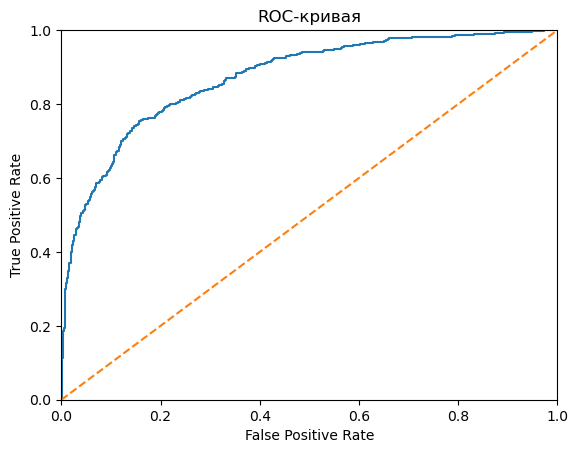

In [50]:
probabilities_test = model.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

roc_auc = roc_auc_score(target_test, probabilities_one_test)
print("ROC_AUC:", roc_auc)

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
plt.figure()
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show()

In [51]:
# Определение важности признаков

features_importance = pd.DataFrame({'name':features_test.columns,'features_importance':model.feature_importances_})
features_importance.sort_values('features_importance',ascending=False).reset_index(drop=True)


,name,features_importance
0,Age,0.288488
1,NumOfProducts,0.176297
2,Balance,0.133814
3,CreditScore,0.101430
4,EstimatedSalary,0.101140
5,Tenure,0.061397
6,IsActiveMember,0.043433
7,Germany,0.040931
8,Gender_men,0.026835
9,HasCrCard,0.013988


<div style="background-color:#e0ffff; color:#191970; padding:10px">
 
# Общий вывод по проекту     

**Целью проекта** было построить систему, способную спрогнозировать, уйдет ли клиент из банка в ближайшее время для того, чтобы можно было их каким-то образом попробовать удержать. При этом нужно было построить модель с максимально большим показателем F-меры, но не меньше 0.59.   

Имелся некоторый датасет с данными в целом о клиентах, в том числе о тех, которые ушли.

Для достижения поставленной цели мной было сделано следующее:

1. Просмотрен имеющийся датасет, произведены его преобразования:
    - использован заполнитель "-1" к отсутствующим данным признака *сколько лет человек является клиентом банка*,
    - исключила нерелевантные признаки(RowNumber, CustomerId, Surname),
    - применила технику прямого кодирования для того, чтобы преобразовать категориальные признаки *пол* и *страна* 
    - также на этом этапе изучила взаимозависимость признаков с целевым признаком, обнаружила наличие некоторой взаимосвязи количества продуктов и возраста с вероятностью ухода клиента. Впоследствии при определении важности признаков в итоговой модели критерий возраста также нашел свое подтверждение,
    - изучила соотношение классов в целях обнаружения из несбалансированности, получилось соотношение примерно 1:4,
    - разбила датасет на тренировочную, валидационную и тестовую выборки
    - применила масштабирование для признаков, имеющих разный масштаб (кредитный рейтинг, возраст, баланс, предполагаемая зарплата).        

2. Использовала получившиеся выборки для обучения моделей классификации Логистической регрессии и Случайного леса без учета дисбаланса классов, зафиксировала получившиеся результаты: метрика F-мера логистической регрессии получилась - 0.329, у Случайного леса - 0.595.

3. Применила **5 вариантов** устранения проблемы дисбаланса классов, изучила полученные результаты на валидационной выборке, составила таблицу - сравнение некоторых метрик получившихся моделей, при этом:     
    - наилучший результат F-меры получился у модели Случайного леса с установлением порога отнесения к признакам 0.38,
    - если задачей исследования является выявление бОльшего количества потенциальных клиентов банка, которые могут уйти, важным показателем является метрика "полнота". Другие метрики также дополняют картину для проведения анализа.
    
4. Выбраная модель показала на тестовой выборке следующие результаты:
    - F-мера - 0.636,
    - полнота - 0.662,
    - ROC_AUC - 0.872,
    - анализ значимости признаков показал наибольшую важность признака возраст.
    
    
    
      
      
<div>